potential representative traces

DEGT-1d: 

MEC-4d: 

UNC8d: 

uinjected: 



In [33]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns

import pandas as pd
import glob

plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42

### HARDCODING THE IMPORT HEKA PATH

In [34]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

### Brief example for heka_reader: we changed 

    # Load a .dat file
    bundle = Bundle(file_name)
    
    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]

### HARDCODING:
- Choose different Reprensentive Traces 
- enter hardcoding part: choose frog ID (e.g. STFX073) and Recording ID (e.g. '001') for each recording condition
- identify series and sweeps per recording and excel sheet

# common axis parameter

In [35]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

#### change initial directory to datFilesSTFX 

In [36]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [37]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedir = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/MetaDelta/'

filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedir)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/MetaDelta/


### ALL traces picked for 30 uM Ibuprofen

In [38]:
####### hardcoding ########## FOR Ibuprofen
#enter here different IDs
#mg419 = M4d (A713T)
mg419frogIbu30 = 'STFX071'
mg419RecNrIbu30 = '011' 
mg419SeriesIbu30 = 2-1
#### STFX070-015 (series 5): clamping errors at positive voltages (maybe not as I needed to switch to NagluIbu)
#### STFX071-011 (series 2): clamping errors at positive voltages, but less
#### STFX070-001 (series 2): 

mg418frogIbu30 = 'STFX033'
mg418RecNrIbu30 = '044' 
mg418SeriesIbu30 = 9-1

pTL69frogIbu30 = 'STFX070'
pTL69RecNrIbu30 = '022' 
pTL69SeriesIbu30 = 4-1

UninjfrogIbu30 = 'STFX033'
UninjRecNrIbu30 = '024' 
UninjSeriesIbu30 = 23-1

### ALL traces picked for 30 uM Fibuprofen

In [39]:
####### hardcoding ########## FOR Ibuprofen
#enter here different IDs
#mg419 = M4d (A713T)
mg419frogFibu30 = 'STFX075'
mg419RecNrFibu30 = '001' 
mg419SeriesFibu30 = 1-1

mg418frogFibu30 = 'STFX073'
mg418RecNrFibu30 = '005' 
mg418SeriesFibu30 = 6-1

pTL69frogFibu30 = 'STFX075'
pTL69RecNrFibu30 = '009' 
pTL69SeriesFibu30 = 16-1

UninjfrogFibu30 = 'STFX073'
UninjRecNrFibu30 = '022' #'006' 
UninjSeriesFibu30 = 18-1#7-1

### ALL traces picked for 30 uM Diclofenac

In [40]:
####### hardcoding ########## FOR Ibuprofen
#enter here different IDs
#mg419 = M4d (A713T)
mg419frogDiclo30 = 'STFX033'
mg419RecNrDiclo30 = '002' 
mg419SeriesDiclo30 = 4-1

mg418frogDiclo30 = 'STFX072'
mg418RecNrDiclo30 = '014' 
mg418SeriesDiclo30 = 20-1

pTL69frogDiclo30 = 'STFX071'
pTL69RecNrDiclo30 = '029' 
pTL69SeriesDiclo30 = 11-1

UninjfrogDiclo30 = 'STFX074'
UninjRecNrDiclo30 = '005' 
UninjSeriesDiclo30 = 7-1

### All traces picked for 30 uM EIPA

In [41]:
####### hardcoding ########## FOR Ibuprofen
#enter here different IDs
#mg419 = M4d (A713T)
mg419frogEIPA30 = 'STFX032'
mg419RecNrEIPA30 = '031' 
mg419SeriesEIPA30 = 20-1

mg418frogEIPA30 = 'STFX033'
mg418RecNrEIPA30 = '029' 
mg418SeriesEIPA30 = 4-1

pTL69frogEIPA30 = 'STFX072'
pTL69RecNrEIPA30 = '019' 
pTL69SeriesEIPA30 = 3-1

UninjfrogEIPA30 = 'STFX030'
UninjRecNrEIPA30 = '043' 
UninjSeriesEIPA30 = 7-1

### The text below finds the .datfile belonging to the recording e.g.  mg419frog/mg419RecNr

#### The text below finds the .datfile belonging to the recording mg419frog/mg419RecNr 30 uM Ibu

In [42]:
mg419filenameIbu30 = 'TEVCMeta'+ mg419frogIbu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xlIbu30 = pd.ExcelFile(filedir+mg419filenameIbu30)#converters={'names':str,'ages':str}
mg419xlIbu30.sheet_names
mg419dfIbu30 = mg419xlIbu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluIbu30': np.int64}) #calls for Sheet names 
mg419RecordingIbu30 = mg419frogIbu30 + mg419RecNrIbu30

#### mg418
mg418filenameIbu30 = 'TEVCMeta'+ mg418frogIbu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg418xlIbu30 = pd.ExcelFile(filedir+mg418filenameIbu30)#converters={'names':str,'ages':str}
mg418xlIbu30.sheet_names
mg418dfIbu30 = mg418xlIbu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluIbu30': np.int64}) #calls for Sheet names 
mg418RecordingIbu30 = mg418frogIbu30 + mg418RecNrIbu30

#### pTL69
pTL69filenameIbu30 = 'TEVCMeta'+ pTL69frogIbu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
pTL69xlIbu30 = pd.ExcelFile(filedir+pTL69filenameIbu30)#converters={'names':str,'ages':str}
pTL69xlIbu30.sheet_names
pTL69dfIbu30 = pTL69xlIbu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluIbu30': np.int64}) #calls for Sheet names 
pTL69RecordingIbu30 = pTL69frogIbu30 + pTL69RecNrIbu30

#### Uninj
UninjfilenameIbu30 = 'TEVCMeta'+ UninjfrogIbu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
UninjxlIbu30 = pd.ExcelFile(filedir+UninjfilenameIbu30)#converters={'names':str,'ages':str}
UninjxlIbu30.sheet_names
UninjdfIbu30 = UninjxlIbu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluIbu30': np.int64}) #calls for Sheet names 
UninjRecordingIbu30 = UninjfrogIbu30 + UninjRecNrIbu30


#### The text below finds the .datfile belonging to the recording mg419frog/mg419RecNr 30 uM Fibuprofen

In [43]:
mg419filenameFibu30 = 'TEVCMeta'+ mg419frogFibu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xlFibu30 = pd.ExcelFile(filedir+mg419filenameFibu30)#converters={'names':str,'ages':str}
mg419xlFibu30.sheet_names
mg419dfFibu30 = mg419xlFibu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64,'NaGlu3': np.int64,'NaGluFibu30': np.int64}) #calls for Sheet names 
mg419RecordingFibu30 = mg419frogFibu30 + mg419RecNrFibu30

#### mg418
mg418filenameFibu30 = 'TEVCMeta'+ mg418frogFibu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg418xlFibu30 = pd.ExcelFile(filedir+mg418filenameFibu30)#converters={'names':str,'ages':str}
mg418xlFibu30.sheet_names
mg418dfFibu30 = mg418xlFibu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGlu3': np.int64, 'NaGluFibu30': np.int64}) #calls for Sheet names 
mg418RecordingFibu30 = mg418frogFibu30 + mg418RecNrFibu30

#### pTL69
pTL69filenameFibu30 = 'TEVCMeta'+ pTL69frogFibu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
pTL69xlFibu30 = pd.ExcelFile(filedir+pTL69filenameFibu30)#converters={'names':str,'ages':str}
pTL69xlFibu30.sheet_names
pTL69dfFibu30 = pTL69xlFibu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluFibu30': np.int64}) #calls for Sheet names 
pTL69RecordingFibu30 = pTL69frogFibu30 + pTL69RecNrFibu30

#### Uninj
UninjfilenameFibu30 = 'TEVCMeta'+ UninjfrogFibu30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
UninjxlFibu30 = pd.ExcelFile(filedir+UninjfilenameFibu30)#converters={'names':str,'ages':str}
UninjxlFibu30.sheet_names
UninjdfFibu30 = UninjxlFibu30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluFibu30': np.int64}) #calls for Sheet names 
UninjRecordingFibu30 = UninjfrogFibu30 + UninjRecNrFibu30


#### The text below finds the .datfile belonging to the recording mg419frog/mg419RecNr 30 uM Diclofenac

In [44]:
mg419filenameDiclo30 = 'TEVCMeta'+ mg419frogDiclo30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xlDiclo30 = pd.ExcelFile(filedir+mg419filenameDiclo30)#converters={'names':str,'ages':str}
mg419xlDiclo30.sheet_names
mg419dfDiclo30 = mg419xlDiclo30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluDiclo30': np.int64}) #calls for Sheet names 
mg419RecordingDiclo30 = mg419frogDiclo30 + mg419RecNrDiclo30

#### mg418
mg418filenameDiclo30 = 'TEVCMeta'+ mg418frogDiclo30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg418xlDiclo30 = pd.ExcelFile(filedir+mg418filenameDiclo30)#converters={'names':str,'ages':str}
mg418xlDiclo30.sheet_names
mg418dfDiclo30 = mg418xlDiclo30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluDiclo30': np.int64}) #calls for Sheet names 
mg418RecordingDiclo30 = mg418frogDiclo30 + mg418RecNrDiclo30

#### pTL69
pTL69filenameDiclo30 = 'TEVCMeta'+ pTL69frogDiclo30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
pTL69xlDiclo30 = pd.ExcelFile(filedir+pTL69filenameDiclo30)#converters={'names':str,'ages':str}
pTL69xlDiclo30.sheet_names
pTL69dfDiclo30 = pTL69xlDiclo30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluDiclo30': np.int64}) #calls for Sheet names 
pTL69RecordingDiclo30 = pTL69frogDiclo30 + pTL69RecNrDiclo30

#### Uninj
UninjfilenameDiclo30 = 'TEVCMeta'+ UninjfrogDiclo30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
UninjxlDiclo30 = pd.ExcelFile(filedir+UninjfilenameDiclo30)#converters={'names':str,'ages':str}
UninjxlDiclo30.sheet_names
UninjdfDiclo30 = UninjxlDiclo30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluDiclo30': np.int64}) #calls for Sheet names 
UninjRecordingDiclo30 = UninjfrogDiclo30 + UninjRecNrDiclo30


#### The text below finds the .datfile belonging to the recording mg419frog/mg419RecNr 30 uM EIPA

In [45]:
mg419filenameEIPA30 = 'TEVCMeta'+ mg419frogEIPA30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xlEIPA30 = pd.ExcelFile(filedir+mg419filenameEIPA30)#converters={'names':str,'ages':str}
mg419xlEIPA30.sheet_names
mg419dfEIPA30 = mg419xlEIPA30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64,'NaGlu3': np.int64, 'NaGluEipa30': np.int64}) #calls for Sheet names 
mg419RecordingEIPA30 = mg419frogEIPA30 + mg419RecNrEIPA30

#### mg418
mg418filenameEIPA30 = 'TEVCMeta'+ mg418frogEIPA30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg418xlEIPA30 = pd.ExcelFile(filedir+mg418filenameEIPA30)#converters={'names':str,'ages':str}
mg418xlEIPA30.sheet_names
mg418dfEIPA30 = mg418xlEIPA30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu5': np.int64, 'NaGluEipa30': np.int64}) #calls for Sheet names 
mg418RecordingEIPA30 = mg418frogEIPA30 + mg418RecNrEIPA30

#### pTL69
pTL69filenameEIPA30 = 'TEVCMeta'+ pTL69frogEIPA30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
pTL69xlEIPA30 = pd.ExcelFile(filedir+pTL69filenameEIPA30)#converters={'names':str,'ages':str}
pTL69xlEIPA30.sheet_names
pTL69dfEIPA30 = pTL69xlEIPA30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluEipa30': np.int64}) #calls for Sheet names 
pTL69RecordingEIPA30 = pTL69frogEIPA30 + pTL69RecNrEIPA30

# #### Uninj
UninjfilenameEIPA30 = 'TEVCMeta'+ UninjfrogEIPA30 +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
UninjxlEIPA30 = pd.ExcelFile(filedir+UninjfilenameEIPA30)#converters={'names':str,'ages':str}
UninjxlEIPA30.sheet_names
UninjdfEIPA30 = UninjxlEIPA30.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64, 'NaGluEipa30': np.int64,'NaGlu5': np.int64 }) #calls for Sheet names 
UninjRecordingEIPA30 = UninjfrogEIPA30 + UninjRecNrEIPA30


In [46]:
UninjRecordingEIPA30

'STFX030043'

### find the .dat file name in the MetaData sheet of the corresponding recording

#### find for 30 uM Ibuprofen

In [47]:
#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFileIbu30 = mg419dfIbu30.Filename[(mg419dfIbu30.CellID == mg419RecordingIbu30)]#.values[0] #values[0] gives me the integer directly. no need for iloc
mg418DatFileIbu30 = mg418dfIbu30.Filename[(mg418dfIbu30.CellID == mg418RecordingIbu30)]
pTL69DatFileIbu30 = pTL69dfIbu30.Filename[(pTL69dfIbu30.CellID == pTL69RecordingIbu30)]
UninjDatFileIbu30 = UninjdfIbu30.Filename[(UninjdfIbu30.CellID == UninjRecordingIbu30)]


#### find .dat file name for 30 uM Fibuprofen

In [48]:
#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFileFibu30 = mg419dfFibu30.Filename[(mg419dfFibu30.CellID == mg419RecordingFibu30)]#.values[0] #values[0] gives me the integer directly. no need for iloc
mg418DatFileFibu30 = mg418dfFibu30.Filename[(mg418dfFibu30.CellID == mg418RecordingFibu30)]
pTL69DatFileFibu30 = pTL69dfFibu30.Filename[(pTL69dfFibu30.CellID == pTL69RecordingFibu30)]
UninjDatFileFibu30 = UninjdfFibu30.Filename[(UninjdfFibu30.CellID == UninjRecordingFibu30)]


In [49]:
UninjDatFileFibu30

16    20190320
Name: Filename, dtype: int64

#### find .dat file name for 30 uM Diclofenac

In [50]:
#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFileDiclo30 = mg419dfDiclo30.Filename[(mg419dfDiclo30.CellID == mg419RecordingDiclo30)]#.values[0] #values[0] gives me the integer directly. no need for iloc
mg418DatFileDiclo30 = mg418dfDiclo30.Filename[(mg418dfDiclo30.CellID == mg418RecordingDiclo30)]
pTL69DatFileDiclo30 = pTL69dfDiclo30.Filename[(pTL69dfDiclo30.CellID == pTL69RecordingDiclo30)]
UninjDatFileDiclo30 = UninjdfDiclo30.Filename[(UninjdfDiclo30.CellID == UninjRecordingDiclo30)]


#### find .dat file name for 30 uM EIPA

In [51]:
#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFileEIPA30 = mg419dfEIPA30.Filename[(mg419dfEIPA30.CellID == mg419RecordingEIPA30)]#.values[0] #values[0] gives me the integer directly. no need for iloc
mg418DatFileEIPA30 = mg418dfEIPA30.Filename[(mg418dfEIPA30.CellID == mg418RecordingEIPA30)]
pTL69DatFileEIPA30 = pTL69dfEIPA30.Filename[(pTL69dfEIPA30.CellID == pTL69RecordingEIPA30)]
UninjDatFileEIPA30 = UninjdfEIPA30.Filename[(UninjdfEIPA30.CellID == UninjRecordingEIPA30)]


In [52]:
UninjDatFileEIPA30

17    20170712
Name: Filename, dtype: int64

### load dat files

#### load dat files 30 uM Ibuprofen

In [53]:
# Load a .dat file
mg419loadFileIbu30 = heka_reader.Bundle(str(mg419DatFileIbu30.iloc[0])+'.dat')
mg418loadFileIbu30 = heka_reader.Bundle(str(mg418DatFileIbu30.iloc[0])+'.dat')
pTL69loadFileIbu30 = heka_reader.Bundle(str(pTL69DatFileIbu30.iloc[0])+'.dat')
UninjloadFileIbu30 = heka_reader.Bundle(str(UninjDatFileIbu30.iloc[0])+'.dat')


#### load dat files 30 uM Fibuprofen

In [54]:
# Load a .dat file
mg419loadFileFibu30 = heka_reader.Bundle(str(mg419DatFileFibu30.iloc[0])+'.dat')
mg418loadFileFibu30 = heka_reader.Bundle(str(mg418DatFileFibu30.iloc[0])+'.dat')
pTL69loadFileFibu30 = heka_reader.Bundle(str(pTL69DatFileFibu30.iloc[0])+'.dat')
UninjloadFileFibu30 = heka_reader.Bundle(str(UninjDatFileFibu30.iloc[0])+'.dat')


#### load dat files 30 uM Diclofenac

In [55]:
# Load a .dat file
mg419loadFileDiclo30 = heka_reader.Bundle(str(mg419DatFileDiclo30.iloc[0])+'.dat')
mg418loadFileDiclo30 = heka_reader.Bundle(str(mg418DatFileDiclo30.iloc[0])+'.dat')
pTL69loadFileDiclo30 = heka_reader.Bundle(str(pTL69DatFileDiclo30.iloc[0])+'.dat')
UninjloadFileDiclo30 = heka_reader.Bundle(str(UninjDatFileDiclo30.iloc[0])+'.dat')


#### load dat files 30 uM EIPA

In [56]:
# Load a .dat file
mg419loadFileEIPA30 = heka_reader.Bundle(str(mg419DatFileEIPA30.iloc[0])+'.dat')
mg418loadFileEIPA30 = heka_reader.Bundle(str(mg418DatFileEIPA30.iloc[0])+'.dat')
pTL69loadFileEIPA30 = heka_reader.Bundle(str(pTL69DatFileEIPA30.iloc[0])+'.dat')
UninjloadFileEIPA30 = heka_reader.Bundle(str(UninjDatFileEIPA30.iloc[0])+'.dat')


### ToDo: Figure out how to simplify calculation of mean 

###  ToDO: figure out how to plot previous trace as well

### ToDo: How to figure out the series number or access the recordung via the label????

#### caculate mean values for IBU

In [57]:
#find the value of the sweep entered in meta data sheet for 
#Ibu30 
mg419LastSweepNaGluIbu30 = mg419dfIbu30.NaGluIbu30[(mg419dfIbu30.CellID == mg419RecordingIbu30)]
mg419CountRampIbu30 = mg419dfIbu30.ContRamp1550[(mg419dfIbu30.CellID == mg419RecordingIbu30)]
### add other cell IDs here, too ####

mg419dataVol1Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-2 ,1]
mg419dataVol3Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-3 ,1]

mg419dataCur1Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-2 ,0]
mg419dataCur3Ibu30 = mg419loadFileIbu30.data[mg419SeriesIbu30,mg419CountRampIbu30.iloc[0]-1,mg419LastSweepNaGluIbu30.iloc[0]-3 ,0]

mg419dataVolIbu30 = (mg419dataVol1Ibu30+mg419dataVol2Ibu30+mg419dataVol3Ibu30)/3*1000
mg419dataCurIbu30 = (mg419dataCur1Ibu30+mg419dataCur2Ibu30+mg419dataCur3Ibu30)/3*1000000


##### mg418
mg418LastSweepNaGluIbu30 = mg418dfIbu30.NaGluIbu30[(mg418dfIbu30.CellID == mg418RecordingIbu30)]
mg418CountRampIbu30 = mg418dfIbu30.ContRamp1550[(mg418dfIbu30.CellID == mg418RecordingIbu30)]
### add other cell IDs here, too ####

mg418dataVol1Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-2 ,1]
mg418dataVol3Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-3 ,1]

mg418dataCur1Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-2 ,0]
mg418dataCur3Ibu30 = mg418loadFileIbu30.data[mg418SeriesIbu30,mg418CountRampIbu30.iloc[0]-1,mg418LastSweepNaGluIbu30.iloc[0]-3 ,0]

mg418dataVolIbu30 = (mg418dataVol1Ibu30+mg418dataVol2Ibu30+mg418dataVol3Ibu30)/3*1000
mg418dataCurIbu30 = (mg418dataCur1Ibu30+mg418dataCur2Ibu30+mg418dataCur3Ibu30)/3*1000000


##### pTL69
pTL69LastSweepNaGluIbu30 = pTL69dfIbu30.NaGluIbu30[(pTL69dfIbu30.CellID == pTL69RecordingIbu30)]
pTL69CountRampIbu30 = pTL69dfIbu30.ContRamp1550[(pTL69dfIbu30.CellID == pTL69RecordingIbu30)]
### add other cell IDs here, too ####

pTL69dataVol1Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-2 ,1]
pTL69dataVol3Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-3 ,1]

pTL69dataCur1Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-2 ,0]
pTL69dataCur3Ibu30 = pTL69loadFileIbu30.data[pTL69SeriesIbu30,pTL69CountRampIbu30.iloc[0]-1,pTL69LastSweepNaGluIbu30.iloc[0]-3 ,0]

pTL69dataVolIbu30 = (pTL69dataVol1Ibu30+pTL69dataVol2Ibu30+pTL69dataVol3Ibu30)/3*1000
pTL69dataCurIbu30 = (pTL69dataCur1Ibu30+pTL69dataCur2Ibu30+pTL69dataCur3Ibu30)/3*1000000


##### Uninj
UninjLastSweepNaGluIbu30 = UninjdfIbu30.NaGluIbu30[(UninjdfIbu30.CellID == UninjRecordingIbu30)]
UninjCountRampIbu30 = UninjdfIbu30.ContRamp1550[(UninjdfIbu30.CellID == UninjRecordingIbu30)]
### add other cell IDs here, too ####

UninjdataVol1Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-2 ,1]
UninjdataVol3Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-3 ,1]

UninjdataCur1Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-2 ,0]
UninjdataCur3Ibu30 = UninjloadFileIbu30.data[UninjSeriesIbu30,UninjCountRampIbu30.iloc[0]-1,UninjLastSweepNaGluIbu30.iloc[0]-3 ,0]

UninjdataVolIbu30 = (UninjdataVol1Ibu30+UninjdataVol2Ibu30+UninjdataVol3Ibu30)/3*1000
UninjdataCurIbu30 = (UninjdataCur1Ibu30+UninjdataCur2Ibu30+UninjdataCur3Ibu30)/3*1000000



#### caculate mean values for 30 uM Fibuprofen (includes before and after) 

In [58]:
#find the value of the sweep entered in meta data sheet for 
#Fibu30 
mg419LastSweepNaGluFibu30 = mg419dfFibu30.NaGluFibu30[(mg419dfFibu30.CellID == mg419RecordingFibu30)]
mg419CountRampFibu30 = mg419dfFibu30.ContRamp1550[(mg419dfFibu30.CellID == mg419RecordingFibu30)]
### BEFORE FIBU, BUT HARDCODED
mg419LastSweepNaGlu3 = mg419dfFibu30.NaGlu3[(mg419dfFibu30.CellID == mg419RecordingFibu30)]
### add other cell IDs here, too ####

### CALUCLATE TRACEBEFOREFIBU
mg419dataVol1Naglu3 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2Naglu3= mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-2 ,1]
mg419dataVol3Naglu3 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-3 ,1]

mg419dataCur1Naglu3 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2Naglu3 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-2 ,0]
mg419dataCur3Naglu3 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGlu3.iloc[0]-3 ,0]

mg419dataVolNaglu3= (mg419dataVol1Naglu3+mg419dataVol2Naglu3+mg419dataVol3Naglu3)/3*1000
mg419dataCurNaglu3 = (mg419dataCur1Naglu3+mg419dataCur2Naglu3+mg419dataCur3Naglu3)/3*1000000

### CALCULATE FIBU
mg419dataVol1Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-2 ,1]
mg419dataVol3Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-3 ,1]

mg419dataCur1Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-2 ,0]
mg419dataCur3Fibu30 = mg419loadFileFibu30.data[mg419SeriesFibu30,mg419CountRampFibu30.iloc[0]-1,mg419LastSweepNaGluFibu30.iloc[0]-3 ,0]

mg419dataVolFibu30 = (mg419dataVol1Fibu30+mg419dataVol2Fibu30+mg419dataVol3Fibu30)/3*1000
mg419dataCurFibu30 = (mg419dataCur1Fibu30+mg419dataCur2Fibu30+mg419dataCur3Fibu30)/3*1000000


##### mg418
mg418LastSweepNaGluFibu30 = mg418dfFibu30.NaGluFibu30[(mg418dfFibu30.CellID == mg418RecordingFibu30)]
mg418CountRampFibu30 = mg418dfFibu30.ContRamp1550[(mg418dfFibu30.CellID == mg418RecordingFibu30)]
### trace before Fibu
mg418LastSweepNaGlu1 = mg418dfFibu30.NaGlu1[(mg418dfFibu30.CellID == mg418RecordingFibu30)]
### add other cell IDs here, too ####

#### traces before Fibu
mg418dataVol1NaGlu1 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2NaGlu1 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-2 ,1]
mg418dataVol3NaGlu1 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-3 ,1]

mg418dataCur1NaGlu1 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2NaGlu1= mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-2 ,0]
mg418dataCur3NaGlu1 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGlu1.iloc[0]-3 ,0]

mg418dataVolNaGlu1 = (mg418dataVol1NaGlu1+mg418dataVol2NaGlu1+mg418dataVol3NaGlu1)/3*1000
mg418dataCurNaGlu1 = (mg418dataCur1NaGlu1+mg418dataCur2NaGlu1+mg418dataCur3NaGlu1)/3*1000000


### traces Fibu
mg418dataVol1Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-2 ,1]
mg418dataVol3Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-3 ,1]

mg418dataCur1Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-2 ,0]
mg418dataCur3Fibu30 = mg418loadFileFibu30.data[mg418SeriesFibu30,mg418CountRampFibu30.iloc[0]-1,mg418LastSweepNaGluFibu30.iloc[0]-3 ,0]

mg418dataVolFibu30 = (mg418dataVol1Fibu30+mg418dataVol2Fibu30+mg418dataVol3Fibu30)/3*1000
mg418dataCurFibu30 = (mg418dataCur1Fibu30+mg418dataCur2Fibu30+mg418dataCur3Fibu30)/3*1000000


##### pTL69 #### 
pTL69LastSweepNaGluFibu30 = pTL69dfFibu30.NaGluFibu30[(pTL69dfFibu30.CellID == pTL69RecordingFibu30)]
pTL69CountRampFibu30 = pTL69dfFibu30.ContRamp1550[(pTL69dfFibu30.CellID == pTL69RecordingFibu30)]
####before 
pTL69LastSweepNaGlu1=  pTL69dfFibu30.NaGlu1[(pTL69dfFibu30.CellID == pTL69RecordingFibu30)]
### add other cell IDs here, too ####


##### before Fibu
pTL69dataVol1NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-2 ,1]
pTL69dataVol3NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-3 ,1]

pTL69dataCur1NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-2 ,0]
pTL69dataCur3NaGlu1 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGlu1.iloc[0]-3 ,0]

pTL69dataVolNaGlu1 = (pTL69dataVol1NaGlu1+pTL69dataVol2NaGlu1+pTL69dataVol3NaGlu1)/3*1000
pTL69dataCurNaGlu1 = (pTL69dataCur1NaGlu1+pTL69dataCur2NaGlu1+pTL69dataCur3NaGlu1)/3*1000000


#### Fibu
pTL69dataVol1Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-2 ,1]
pTL69dataVol3Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-3 ,1]

pTL69dataCur1Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-2 ,0]
pTL69dataCur3Fibu30 = pTL69loadFileFibu30.data[pTL69SeriesFibu30,pTL69CountRampFibu30.iloc[0]-1,pTL69LastSweepNaGluFibu30.iloc[0]-3 ,0]

pTL69dataVolFibu30 = (pTL69dataVol1Fibu30+pTL69dataVol2Fibu30+pTL69dataVol3Fibu30)/3*1000
pTL69dataCurFibu30 = (pTL69dataCur1Fibu30+pTL69dataCur2Fibu30+pTL69dataCur3Fibu30)/3*1000000


##### Uninj
UninjLastSweepNaGluFibu30 = UninjdfFibu30.NaGluFibu30[(UninjdfFibu30.CellID == UninjRecordingFibu30)]
UninjCountRampFibu30 = UninjdfFibu30.ContRamp1550[(UninjdfFibu30.CellID == UninjRecordingFibu30)]
### add other cell IDs here, too ####
UninjLastSweepNaGlu3 = UninjdfFibu30.NaGlu1[(UninjdfFibu30.CellID == UninjRecordingFibu30)]

###before Fibu
UninjdataVol1Naglu3 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2Naglu3= UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-2 ,1]
UninjdataVol3Naglu3 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-3 ,1]

UninjdataCur1Naglu3 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2Naglu3 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-2 ,0]
UninjdataCur3Naglu3 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGlu3.iloc[0]-3 ,0]

UninjdataVolNaglu1Fibu= (UninjdataVol1Naglu3+UninjdataVol2Naglu3+UninjdataVol3Naglu3)/3*1000
UninjdataCurNaglu1Fibu = (UninjdataCur1Naglu3+UninjdataCur2Naglu3+UninjdataCur3Naglu3)/3*1000000

### CALCULATE FIBU
UninjdataVol1Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-2 ,1]
UninjdataVol3Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-3 ,1]

UninjdataCur1Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-2 ,0]
UninjdataCur3Fibu30 = UninjloadFileFibu30.data[UninjSeriesFibu30,UninjCountRampFibu30.iloc[0]-1,UninjLastSweepNaGluFibu30.iloc[0]-3 ,0]


UninjdataVolFibu30 = (UninjdataVol1Fibu30+UninjdataVol2Fibu30+UninjdataVol3Fibu30)/3*1000
UninjdataCurFibu30 = (UninjdataCur1Fibu30+UninjdataCur2Fibu30+UninjdataCur3Fibu30)/3*1000000




In [59]:
UninjCountRampFibu30 

16    2
Name: ContRamp1550, dtype: int64

In [60]:
UninjLastSweepNaGluFibu30

16    28
Name: NaGluFibu30, dtype: object

#### caculate mean values for 30 uM Diclofenac

In [61]:
#find the value of the sweep entered in meta data sheet for 
#Diclo30 
mg419LastSweepNaGluDiclo30 = mg419dfDiclo30.NaGluDiclo30[(mg419dfDiclo30.CellID == mg419RecordingDiclo30)]
mg419CountRampDiclo30 = mg419dfDiclo30.ContRamp1550[(mg419dfDiclo30.CellID == mg419RecordingDiclo30)]
### add other cell IDs here, too ####

mg419dataVol1Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-2 ,1]
mg419dataVol3Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-3 ,1]

mg419dataCur1Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-2 ,0]
mg419dataCur3Diclo30 = mg419loadFileDiclo30.data[mg419SeriesDiclo30,mg419CountRampDiclo30.iloc[0]-1,mg419LastSweepNaGluDiclo30.iloc[0]-3 ,0]

mg419dataVolDiclo30 = (mg419dataVol1Diclo30+mg419dataVol2Diclo30+mg419dataVol3Diclo30)/3*1000
mg419dataCurDiclo30 = (mg419dataCur1Diclo30+mg419dataCur2Diclo30+mg419dataCur3Diclo30)/3*1000000


##### mg418
mg418LastSweepNaGluDiclo30 = mg418dfDiclo30.NaGluDiclo30[(mg418dfDiclo30.CellID == mg418RecordingDiclo30)]
mg418CountRampDiclo30 = mg418dfDiclo30.ContRamp1550[(mg418dfDiclo30.CellID == mg418RecordingDiclo30)]
### add other cell IDs here, too ####

mg418dataVol1Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-2 ,1]
mg418dataVol3Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-3 ,1]

mg418dataCur1Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-2 ,0]
mg418dataCur3Diclo30 = mg418loadFileDiclo30.data[mg418SeriesDiclo30,mg418CountRampDiclo30.iloc[0]-1,mg418LastSweepNaGluDiclo30.iloc[0]-3 ,0]

mg418dataVolDiclo30 = (mg418dataVol1Diclo30+mg418dataVol2Diclo30+mg418dataVol3Diclo30)/3*1000
mg418dataCurDiclo30 = (mg418dataCur1Diclo30+mg418dataCur2Diclo30+mg418dataCur3Diclo30)/3*1000000


##### pTL69
pTL69LastSweepNaGluDiclo30 = pTL69dfDiclo30.NaGluDiclo30[(pTL69dfDiclo30.CellID == pTL69RecordingDiclo30)]
pTL69CountRampDiclo30 = pTL69dfDiclo30.ContRamp1550[(pTL69dfDiclo30.CellID == pTL69RecordingDiclo30)]
### add other cell IDs here, too ####

pTL69dataVol1Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-2 ,1]
pTL69dataVol3Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-3 ,1]

pTL69dataCur1Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-2 ,0]
pTL69dataCur3Diclo30 = pTL69loadFileDiclo30.data[pTL69SeriesDiclo30,pTL69CountRampDiclo30.iloc[0]-1,pTL69LastSweepNaGluDiclo30.iloc[0]-3 ,0]

pTL69dataVolDiclo30 = (pTL69dataVol1Diclo30+pTL69dataVol2Diclo30+pTL69dataVol3Diclo30)/3*1000
pTL69dataCurDiclo30 = (pTL69dataCur1Diclo30+pTL69dataCur2Diclo30+pTL69dataCur3Diclo30)/3*1000000


##### Uninj
UninjLastSweepNaGluDiclo30 = UninjdfDiclo30.NaGluDiclo30[(UninjdfDiclo30.CellID == UninjRecordingDiclo30)]
UninjCountRampDiclo30 = UninjdfDiclo30.ContRamp1550[(UninjdfDiclo30.CellID == UninjRecordingDiclo30)]
### add other cell IDs here, too ####

UninjdataVol1Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-2 ,1]
UninjdataVol3Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-3 ,1]

UninjdataCur1Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-2 ,0]
UninjdataCur3Diclo30 = UninjloadFileDiclo30.data[UninjSeriesDiclo30,UninjCountRampDiclo30.iloc[0]-1,UninjLastSweepNaGluDiclo30.iloc[0]-3 ,0]

UninjdataVolDiclo30 = (UninjdataVol1Diclo30+UninjdataVol2Diclo30+UninjdataVol3Diclo30)/3*1000
UninjdataCurDiclo30 = (UninjdataCur1Diclo30+UninjdataCur2Diclo30+UninjdataCur3Diclo30)/3*1000000



#### caculate mean values for 30 uM EIPA

In [62]:
#find the value of the sweep entered in meta data sheet for 
#EIPA30 
mg419LastSweepNaGluEIPA30 = mg419dfEIPA30.NaGluEipa30[(mg419dfEIPA30.CellID == mg419RecordingEIPA30)]
mg419CountRampEIPA30 = mg419dfEIPA30.ContRamp1550[(mg419dfEIPA30.CellID == mg419RecordingEIPA30)]
### BEFORE EIPA, BUT HARDCODED
#### change NaGLu3 depending on which was previous solution
mg419LastSweepBeforeEIPA = mg419dfEIPA30.NaGlu3[(mg419dfEIPA30.CellID == mg419RecordingEIPA30)]
# ### add other cell IDs here, too ####

### CALUCLATE TRACEBEFOREEIPA
mg419dataVol1BeforeEIPA = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2BeforeEIPA= mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-2 ,1]
mg419dataVol3BeforeEIPA = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-3 ,1]

mg419dataCur1BeforeEIPA = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2BeforeEIPA = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-2 ,0]
mg419dataCur3BeforeEIPA= mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepBeforeEIPA.iloc[0]-3 ,0]

mg419dataVolBeforeEIPA= (mg419dataVol1BeforeEIPA+mg419dataVol2BeforeEIPA+mg419dataVol3BeforeEIPA)/3*1000
mg419dataCurBeforeEIPA = (mg419dataCur1BeforeEIPA+mg419dataCur2BeforeEIPA+mg419dataCur3BeforeEIPA)/3*1000000

### CALCULATE EIPA
mg419dataVol1EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-2 ,1]
mg419dataVol3EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-3 ,1]

mg419dataCur1EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-2 ,0]
mg419dataCur3EIPA30 = mg419loadFileEIPA30.data[mg419SeriesEIPA30,mg419CountRampEIPA30.iloc[0]-1,mg419LastSweepNaGluEIPA30.iloc[0]-3 ,0]

mg419dataVolEIPA30 = (mg419dataVol1EIPA30+mg419dataVol2EIPA30+mg419dataVol3EIPA30)/3*1000
mg419dataCurEIPA30 = (mg419dataCur1EIPA30+mg419dataCur2EIPA30+mg419dataCur3EIPA30)/3*1000000


##### mg418
mg418LastSweepNaGluEIPA30 = mg418dfEIPA30.NaGluEipa30[(mg418dfEIPA30.CellID == mg418RecordingEIPA30)]
mg418CountRampEIPA30 = mg418dfEIPA30.ContRamp1550[(mg418dfEIPA30.CellID == mg418RecordingEIPA30)]
### trace before EIPA
mg418LastSweepBeforeEIPA = mg418dfEIPA30.NaGlu5[(mg418dfEIPA30.CellID == mg418RecordingEIPA30)]
### add other cell IDs here, too ####

#### traces before EIPA
mg418dataVol1BeforeEIPA = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2BeforeEIPA = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-2 ,1]
mg418dataVol3BeforeEIPA = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-3 ,1]

mg418dataCur1BeforeEIPA = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2BeforeEIPA= mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-2 ,0]
mg418dataCur3BeforeEIPA = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepBeforeEIPA.iloc[0]-3 ,0]

mg418dataVolBeforeEIPA = (mg418dataVol1BeforeEIPA+mg418dataVol2BeforeEIPA+mg418dataVol3BeforeEIPA)/3*1000
mg418dataCurBeforeEIPA= (mg418dataCur1BeforeEIPA+mg418dataCur2BeforeEIPA+mg418dataCur3BeforeEIPA)/3*1000000


### traces EIPA
mg418dataVol1EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-2 ,1]
mg418dataVol3EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-3 ,1]

mg418dataCur1EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-2 ,0]
mg418dataCur3EIPA30 = mg418loadFileEIPA30.data[mg418SeriesEIPA30,mg418CountRampEIPA30.iloc[0]-1,mg418LastSweepNaGluEIPA30.iloc[0]-3 ,0]

mg418dataVolEIPA30 = (mg418dataVol1EIPA30+mg418dataVol2EIPA30+mg418dataVol3EIPA30)/3*1000
mg418dataCurEIPA30 = (mg418dataCur1EIPA30+mg418dataCur2EIPA30+mg418dataCur3EIPA30)/3*1000000


##### pTL69 #### 
pTL69LastSweepNaGluEIPA30 = pTL69dfEIPA30.NaGluEipa30[(pTL69dfEIPA30.CellID == pTL69RecordingEIPA30)]
pTL69CountRampEIPA30 = pTL69dfEIPA30.ContRamp1550[(pTL69dfEIPA30.CellID == pTL69RecordingEIPA30)]
####before 
pTL69LastSweepBeforeEIPA=  pTL69dfEIPA30.NaGlu1[(pTL69dfEIPA30.CellID == pTL69RecordingEIPA30)]
### add other cell IDs here, too ####

##### before EIPA
pTL69dataVol1BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-2 ,1]
pTL69dataVol3BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-3 ,1]

pTL69dataCur1BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-2 ,0]
pTL69dataCur3BeforeEIPA = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepBeforeEIPA.iloc[0]-3 ,0]

pTL69dataVolBeforeEIPA = (pTL69dataVol1BeforeEIPA+pTL69dataVol2BeforeEIPA+pTL69dataVol3BeforeEIPA)/3*1000
pTL69dataCurBeforeEIPA = (pTL69dataCur1BeforeEIPA+pTL69dataCur2BeforeEIPA+pTL69dataCur3BeforeEIPA)/3*1000000


#### EIPA
pTL69dataVol1EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-2 ,1]
pTL69dataVol3EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-3 ,1]

pTL69dataCur1EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-2 ,0]
pTL69dataCur3EIPA30 = pTL69loadFileEIPA30.data[pTL69SeriesEIPA30,pTL69CountRampEIPA30.iloc[0]-1,pTL69LastSweepNaGluEIPA30.iloc[0]-3 ,0]

pTL69dataVolEIPA30 = (pTL69dataVol1EIPA30+pTL69dataVol2EIPA30+pTL69dataVol3EIPA30)/3*1000
pTL69dataCurEIPA30 = (pTL69dataCur1EIPA30+pTL69dataCur2EIPA30+pTL69dataCur3EIPA30)/3*1000000


# ##### Uninj
UninjLastSweepNaGluEIPA30 = UninjdfEIPA30.NaGluEipa30[(UninjdfEIPA30.CellID == UninjRecordingEIPA30)]
UninjCountRampEIPA30 = UninjdfEIPA30.ContRamp1550[(UninjdfEIPA30.CellID == UninjRecordingEIPA30)]

UninjLastSweepBeforeEIPA = UninjdfEIPA30.NaGlu5[(UninjdfEIPA30.CellID ==UninjRecordingEIPA30)]

UninjdataVol1BeforeEIPA = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2BeforeEIPA= UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-2 ,1]
UninjdataVol3BeforeEIPA = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-3 ,1]

UninjdataCur1BeforeEIPA = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2BeforeEIPA = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-2 ,0]
UninjdataCur3BeforeEIPA= UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepBeforeEIPA.iloc[0]-3 ,0]

UninjdataVolBeforeEIPA= (UninjdataVol1BeforeEIPA+UninjdataVol2BeforeEIPA+UninjdataVol3BeforeEIPA)/3*1000
UninjdataCurBeforeEIPA = (UninjdataCur1BeforeEIPA+UninjdataCur2BeforeEIPA+UninjdataCur3BeforeEIPA)/3*1000000

### CALCULATE EIPA
UninjdataVol1EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-1 ,1]# remember python nomenclature
UninjdataVol2EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-2 ,1]
UninjdataVol3EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-3 ,1]

UninjdataCur1EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-1 ,0]# remember python nomenclature
UninjdataCur2EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-2 ,0]
UninjdataCur3EIPA30 = UninjloadFileEIPA30.data[UninjSeriesEIPA30,UninjCountRampEIPA30.iloc[0]-1,UninjLastSweepNaGluEIPA30.iloc[0]-3 ,0]

UninjdataVolEIPA30 = (UninjdataVol1EIPA30+UninjdataVol2EIPA30+UninjdataVol3EIPA30)/3*1000
UninjdataCurEIPA30 = (UninjdataCur1EIPA30+UninjdataCur2EIPA30+UninjdataCur3EIPA30)/3*1000000




## plot all representative traces drug (doesn't include before drug. how does mean I Naglu look like?)

In [63]:
colorM4 = (0.30, 0.69, 0.29)
colorU8 = (0.60, 0.31,0.64)
colorDT1 = (0.89, 0.11,0.10)
colorM10 = (1, 0.50,0)
colorDel1 = (0.22,0.49,0.72)
coloruninj = (0.00, 0.00, 0.00)
#colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]


### MAKE IV CURVES

### amiloride analog

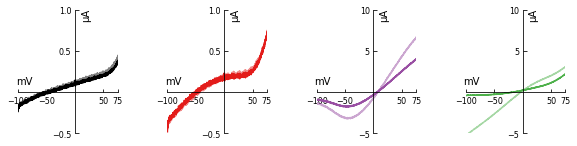

In [115]:
#plt.figure(figsize=(8.5, 8)) 
fig = plt.figure() 
fig.set_figheight(2.2)
fig.set_figwidth(9.5)
#plt.subplots(2, 2, sharex='col')
#ax1 = plt.subplot(3,3,1)
ax0 = plt.subplot(1,4,1)

plt.plot(UninjdataVolBeforeEIPA[450:1449],UninjdataCurBeforeEIPA[450:1449], color= 'black',label="before", alpha=0.5)
plt.plot(UninjdataVolEIPA30[450:1449],UninjdataCurEIPA30[450:1449], color= 'black',label="30 µM EIPA")

ax1 = plt.subplot(1,4,2)
#plt.plot(mg418dataVolIbu30[450:1449],mg418dataCurIbu30[450:1449], color= colorDT1,label="30 uM Ibu")
plt.plot(mg418dataVolBeforeEIPA[450:1449],mg418dataCurBeforeEIPA[450:1449], color= colorDT1,label="before", alpha=0.5)
plt.plot(mg418dataVolEIPA30[450:1449],mg418dataCurEIPA30[450:1449], color= colorDT1,label="30 µM EIPA")

#plt.plot(mg418dataVolDiclo30[450:1449],mg418dataCurDiclo30[450:1449], color= colorDT1,label="30 uM Diclo")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")

ax2 = plt.subplot(1,4,3)
#plt.plot(pTL69dataVolIbu30[450:1449],pTL69dataCurIbu30[450:1449], color = colorU8,label="UNC-8d")
plt.plot(pTL69dataVolBeforeEIPA[450:1449],pTL69dataCurBeforeEIPA[450:1449], color = colorU8,label="before", alpha=0.5)
plt.plot(pTL69dataVolEIPA30[450:1449],pTL69dataCurEIPA30[450:1449], color = colorU8,label="30 µM EIPA")
#plt.plot(pTL69dataVolDiclo30[450:1449],pTL69dataCurDiclo30[450:1449], color = colorU8,label="UNC-8d")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")

ax3 = plt.subplot(1,4,4)
#plt.plot(mg419dataVolIbu30[450:1449],mg419dataCurIbu30[450:1449], color= colorM4,label="MEC-4d")
plt.plot(mg419dataVolBeforeEIPA[450:1449],mg419dataCurBeforeEIPA[450:1449], color= colorM4,label="before", alpha=0.5)
plt.plot(mg419dataVolEIPA30[450:1449],mg419dataCurEIPA30[450:1449], color= colorM4,label="30 µM EIPA")

#plt.plot(mg419dataVolDiclo30[450:1449],mg419dataCurDiclo30[450:1449], color= colorM4,label="MEC-4d")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")
xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]

##### AXIS 2####
ax0.set_ylim([-0.5, 1])
ax0.spines['right'].set_visible(False)                                  # no spine at the right
ax0.spines['top'].set_visible(False)                                     # no spine at the top
ax0.yaxis.set_ticks_position('left')                                     # ticks at the left
ax0.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax0.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax0.spines['bottom'].set_position('zero') 
ax0.spines['top'].set_position(('axes',5)) 
ax0.get_yaxis().set_tick_params(direction='in')
ax0.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.set_title('MEC-4d (A713T)',size=14)
#ax2.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax0.set_xlim(xlimSet)
ax0.set_xticks(xticksSet)
ax0.set_yticks([-0.5,0.5,1])
ax0.set_xlabel('mV',fontsize=AxisLabelSize)
ax0.set_ylabel('µA',fontsize=AxisLabelSize)
ax0.xaxis.set_label_coords(0.06,0.46)
ax0.yaxis.set_label_coords(0.73,0.96)
ax0.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax0.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)
#ax1.set_title('30 uM Ibu',size=14, color = 'red')

##### AXIS 2####
ax1.set_ylim([-0.5, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position('zero') 
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.set_title('MEC-4d (A713T)',size=14)
#ax2.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.set_xlim(xlimSet)
ax1.set_xticks(xticksSet)
ax1.set_yticks([-0.5,0.5,1])
ax1.set_xlabel('mV',fontsize=AxisLabelSize)
ax1.set_ylabel('µA',fontsize=AxisLabelSize)
ax1.xaxis.set_label_coords(0.06,0.46)
ax1.yaxis.set_label_coords(0.73,0.96)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax1.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)
#ax1.set_title('30 uM Ibu',size=14, color = 'red')

##### AXIS 3####
ax2.set_ylim([-5,10])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position('zero') 
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
#ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1          
#ax3.set_title('UNC-8d (G378E)',size=14)
#ax3.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.set_xlim(xlimSet)
ax2.set_xticks(xticksSet)
ax2.set_yticks([-5,5,10])
ax2.set_xlabel('mV',fontsize=AxisLabelSize)
ax2.set_ylabel('µA',fontsize=AxisLabelSize)
ax2.xaxis.set_label_coords(0.06,0.46)
ax2.yaxis.set_label_coords(0.73,0.96)
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax2.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 4####
ax3.set_ylim([-5, 10])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position('zero')  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
#a4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.set_xlim(xlimSet)
ax3.set_xticks(xticksSet)
ax3.set_yticks([-5,5,10])
ax3.set_xlabel('mV',fontsize=AxisLabelSize)
ax3.set_ylabel('µA',fontsize=AxisLabelSize)
ax3.xaxis.set_label_coords(0.06,0.46)
ax3.yaxis.set_label_coords(0.73,0.96)
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
# ax3.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)

plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=2, wspace=0.5)     
 
plt.savefig(filedirManuscript+"Fig3-IVcurves-amilAnalog"+'.pdf')

#plt.savefig('/Users/Fechner/Dropbox/Manuscript_Pharmacology_DEGENACASIC⁩/FiguresManuscript⁩/Fig1/'+"Fig1-NaGlu-IVcurves"+'.jpg')
#Dropbox⁩ ▸ ⁨ManuscriptPharmacologyDEGENACASIC⁩ ▸ ⁨FiguresManuscript⁩
plt.show()



#### NSAIDs

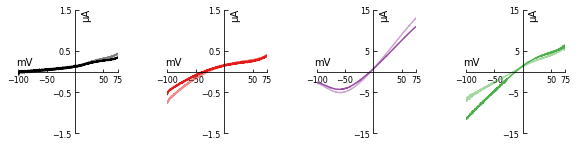

In [101]:
#plt.figure(figsize=(8.5, 8)) 
fig = plt.figure() 
fig.set_figheight(2.2)
fig.set_figwidth(9.5)
#plt.subplots(2, 2, sharex='col')
#ax1 = plt.subplot(3,3,1)
ax0 = plt.subplot(1,4,1)
plt.plot(UninjdataVolNaglu1Fibu[450:1449],UninjdataCurNaglu1Fibu[450:1449], color= 'black', alpha=0.5) #,label="before",
plt.plot(UninjdataVolFibu30[450:1449],UninjdataCurFibu30[450:1449], color= 'black')#,label="30 µM Fibu"


ax1 = plt.subplot(1,4,2)
#plt.plot(mg418dataVolIbu30[450:1449],mg418dataCurIbu30[450:1449], color= colorDT1,label="30 uM Ibu")
plt.plot(mg418dataVolNaGlu1[450:1449],mg418dataCurNaGlu1[450:1449], color= colorDT1, alpha=0.5)
plt.plot(mg418dataVolFibu30[450:1449],mg418dataCurFibu30[450:1449], color= colorDT1)

#plt.plot(mg418dataVolDiclo30[450:1449],mg418dataCurDiclo30[450:1449], color= colorDT1,label="30 uM Diclo")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")

ax2 = plt.subplot(1,4,3)
#plt.plot(pTL69dataVolIbu30[450:1449],pTL69dataCurIbu30[450:1449], color = colorU8,label="UNC-8d")
plt.plot(pTL69dataVolNaGlu1[450:1449],pTL69dataCurNaGlu1[450:1449], color = colorU8, alpha=0.5)
plt.plot(pTL69dataVolFibu30[450:1449],pTL69dataCurFibu30[450:1449], color = colorU8)
#plt.plot(pTL69dataVolDiclo30[450:1449],pTL69dataCurDiclo30[450:1449], color = colorU8,label="UNC-8d")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")

ax3 = plt.subplot(1,4,4)
#plt.plot(mg419dataVolIbu30[450:1449],mg419dataCurIbu30[450:1449], color= colorM4,label="MEC-4d")
plt.plot(mg419dataVolNaglu3[450:1449],mg419dataCurNaglu3[450:1449], color= colorM4, alpha=0.5)
plt.plot(mg419dataVolFibu30[450:1449],mg419dataCurFibu30[450:1449], color= colorM4)

#plt.plot(mg419dataVolDiclo30[450:1449],mg419dataCurDiclo30[450:1449], color= colorM4,label="MEC-4d")
#plt.plot(UninjdataVolIbu30[450:1449],UninjdataCurIbu30[450:1449], color= coloruninj,label="Uninj")

xlimSet = [-100,75]
xticksSet=[-100,-50,50,75]

AxisTickLabelSize =8
##### AXIS 2####
ax0.set_ylim([-1.5, 1.5])
ax0.spines['right'].set_visible(False)                                  # no spine at the right
ax0.spines['top'].set_visible(False)                                     # no spine at the top
ax0.yaxis.set_ticks_position('left')                                     # ticks at the left
ax0.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax0.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax0.spines['bottom'].set_position('zero') 
ax0.spines['top'].set_position(('axes',5)) 
ax0.get_yaxis().set_tick_params(direction='in')
ax0.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.set_title('MEC-4d (A713T)',size=14)
#ax2.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax0.set_xlim(xlimSet)
ax0.set_xticks(xticksSet)
ax0.set_yticks([-1.5,-0.5,0.5,1.5])
ax0.set_xlabel('mV',fontsize=AxisLabelSize)
ax0.set_ylabel('µA',fontsize=AxisLabelSize)
ax0.xaxis.set_label_coords(0.06,0.62)
ax0.yaxis.set_label_coords(0.73,0.96)
ax0.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax0.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)
#ax1.set_title('30 uM Ibu',size=14, color = 'red')
# ax0.annotate('pre',xy=(50, 35),xycoords='figure points', color="black", alpha=0.5)#FIGURE Poitns: default coordinates
# ax0.annotate('Fibu',xy=(42, 50),xycoords='figure points', color="black")

##### AXIS 2####
ax1.set_ylim([-1.5, 1.5])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position('zero') 
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.set_title('MEC-4d (A713T)',size=14)
#ax2.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.set_xlim(xlimSet)
ax1.set_xticks(xticksSet)
ax1.set_yticks([-1.5,-0.5,0.5,1.5])
ax1.set_xlabel('mV',fontsize=AxisLabelSize)
ax1.set_ylabel('µA',fontsize=AxisLabelSize)
ax1.xaxis.set_label_coords(0.06,0.62)
ax1.yaxis.set_label_coords(0.73,0.96)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
# ax1.annotate('pre',xy=(150, 35),xycoords='figure points', color=colorDT1, alpha=0.5)#FIGURE Poitns: default coordinates
# ax1.annotate('Fibu',xy=(142, 50),xycoords='figure points', color=colorDT1)
#ax1.set_title('30 uM Ibu',size=14, color = 'red')

##### AXIS 3####
ax2.set_ylim([-15,15])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position('zero') 
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
#ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1          
#ax3.set_title('UNC-8d (G378E)',size=14)
#ax3.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.set_xlim(xlimSet)
ax2.set_xticks(xticksSet)
ax2.set_yticks([-15,-5,5,15])
ax2.set_xlabel('mV',fontsize=AxisLabelSize)
ax2.set_ylabel('µA',fontsize=AxisLabelSize)
ax2.xaxis.set_label_coords(0.06,0.62)
ax2.yaxis.set_label_coords(0.73,0.96)
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# ax2.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 4####
ax3.set_ylim([-15, 15])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position('zero')  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
#a4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.set_xlim(xlimSet)
ax3.set_xticks(xticksSet)
ax3.set_yticks([-15,-5,5,15])
ax3.set_xlabel('mV',fontsize=AxisLabelSize)
ax3.set_ylabel('µA',fontsize=AxisLabelSize)
ax3.xaxis.set_label_coords(0.06,0.62)
ax3.yaxis.set_label_coords(0.73,0.96)
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
# ax3.legend(bbox_to_anchor=(0.57, 0.3, 0.11, 0.78),frameon=False)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)

#plt.gcf().subplots_adjust(bottom=0.1, left=0.1,hspace=.5, wspace=0.3) 
plt.gcf().subplots_adjust(bottom=0.1, left=0.1,right=None, top=None,hspace=2, wspace=0.5)     
 
    
plt.savefig(filedirManuscript+"Fig4-IVcurves-NSAIDs"+'.pdf')

#plt.savefig('/Users/Fechner/Dropbox/Manuscript_Pharmacology_DEGENACASIC⁩/FiguresManuscript⁩/Fig1/'+"Fig1-NaGlu-IVcurves"+'.jpg')
#Dropbox⁩ ▸ ⁨ManuscriptPharmacologyDEGENACASIC⁩ ▸ ⁨FiguresManuscript⁩
plt.show()

